## <font color='green'>Project: Customer Segmentation Using RFM Analysis for a UK Based Retail Online Store

- **Analysis Scope**: Focused exclusively on `customer transactions from the United Kingdom for a UK-based online retail store`.
- **Data Consideration**: Analyzed transactions within the time period from `'2010-12-01' to '2011-12-09'.` 
- **Recency & Frequency**: Calculated based on `positive offer price transactions only`.  
- **Monetary Value**: Computed by including `all transactions, including returns (negative offer price)`.  


### <font color='purple'>Step 1: Importing the necessary libraries

In [1]:
# =========================================================
# Importing all the necessary libraries
# =========================================================
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import os

import time
script_start_time = time.time()


pd.set_option('display.max_columns', None)# To display all columns in pandas dataframe
# set max_rows option to None
pd.options.display.max_rows = None      # To display all the requested rows
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
# Set the maximum width of each column to display
pd.set_option('display.max_colwidth', None)

### <font color='purple'>Step 2: Loading Customers Transaction Data for RFM Analysis

In [2]:
# =========================================================
# Loading the dataset
# =========================================================

# #(UNCOMMENT THIS FOR SUBSEQUENT RUNS) -> ONLY FIRST RUN
# retail_data = pd.read_excel("./Dataset/Online_Retail.xlsx", engine='openpyxl')
# # Saving the data file to csv (for faster read)
# retail_data.to_csv("./Dataset/Online_Retail.csv", index=False)

# Reading the retail_data file
retail_data = pd.read_csv("./Dataset/Online_Retail.csv")
retail_data_orig = retail_data.copy()

print(retail_data.shape)
retail_data.head(5)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Desired 'InvoiceDate' date format
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate']).dt.date

In [4]:
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [5]:
print(f"Data Time Period Consideration: '{retail_data['InvoiceDate'].min()}' to '{retail_data['InvoiceDate'].max()}'")

Data Time Period Consideration: '2010-12-01' to '2011-12-09'


### <font color='green'>Additional Variable Information

- <font color='darkgreen'>**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation.
    

- <font color='darkgreen'>**StockCode**:  
  Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
  
  
- <font color='darkgreen'>**Description**:  
  Product (item) name. Nominal.
    
    
- <font color='darkgreen'>**Quantity**:  
  The quantities of each product (item) per transaction. Numeric.
    
    
- <font color='darkgreen'>**InvoiceDate**:  
  Invoice Date and time. Numeric, the day and time when each transaction was generated.
    
    
- <font color='darkgreen'>**UnitPrice**:  
  Unit price. Numeric, Product price per unit in sterling.
    
    
- <font color='darkgreen'>**CustomerID**:  
  Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    
    
- <font color='darkgreen'>**Country**:  
  Country name. Nominal, the name of the country where each customer resides.
<br>


#### <font color='blue'>Creating a directory to save all files that shall be used for final RFM Analysis

In [6]:
# ------------------------------------------------------------------------------------
# Creating a directory to save all files that shall be used for final RFM Analysis
# ------------------------------------------------------------------------------------

# Define the directory to save generated files
directory_save_files = './Output_Files'

# Create the directory if it doesn't exist
if not os.path.exists(directory_save_files):
    os.makedirs(directory_save_files)

### <font color='purple'>Data Stats

In [7]:
# Checking datatypes
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Checking for missing values
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### <font color='purple'>Step 3: Data Preparation and Cleaning 

#### <font color='blue'>(3.1) RFM Segmentation Analysis shall be used to launch campaigns for targeted customers. (Customer ID is essential)

In [10]:
print(f"Proportion of records without CustomerID: {100*retail_data['CustomerID'].isnull().sum()/retail_data.shape[0]:.2f}%")

# CustomerID is essential. ELiminating data without CustomerID
print("Elimiating transactions data without CustomerID...")
retail_data = retail_data.loc[~pd.isna(retail_data['CustomerID']),:].reset_index(drop=True)
retail_data.shape

Proportion of records without CustomerID: 24.93%
Elimiating transactions data without CustomerID...


(406829, 8)

In [11]:
# Rechecking for missing values
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Observation:**<br>No missing values are present in the dataset.

In [12]:
# =============================================================================
# Handling feature dtypes 
# =============================================================================

# String Dtype columns
str_cols = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
for col_ in str_cols:
    if col_ == 'CustomerID':
        retail_data[col_] = retail_data[col_].astype(int) # Default interpretation is a float number (prior converting the column values to string) 
    retail_data[col_] = retail_data[col_].astype(str)

# Reset index
retail_data.reset_index(drop=True, inplace=True)

In [13]:
retail_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047,United Kingdom


In [14]:
print("Percentage of Countrywise Transaction Counts vs Total:\n")
## Checking countrywise distribution of records
round(100*retail_data.Country.value_counts()/retail_data.shape[0], 2)

Percentage of Countrywise Transaction Counts vs Total:



United Kingdom          88.95
Germany                  2.33
France                   2.09
EIRE                     1.84
Spain                    0.62
Netherlands              0.58
Belgium                  0.51
Switzerland              0.46
Portugal                 0.36
Australia                0.31
Norway                   0.27
Italy                    0.20
Channel Islands          0.19
Finland                  0.17
Cyprus                   0.15
Sweden                   0.11
Austria                  0.10
Denmark                  0.10
Japan                    0.09
Poland                   0.08
USA                      0.07
Israel                   0.06
Unspecified              0.06
Singapore                0.06
Iceland                  0.04
Canada                   0.04
Greece                   0.04
Malta                    0.03
United Arab Emirates     0.02
European Community       0.01
RSA                      0.01
Lebanon                  0.01
Lithuania                0.01
Brazil    

**Observation:**

1. **UK Dominance**: The United Kingdom accounts for **88.95%** of transactions, highlighting a highly concentrated market.  
2. **Low Global Spread**: Other countries contribute minimally, with Germany **(2.33%)** and France **(2.09%)** following distantly.  
3. **Growth Opportunities**: Regions like the USA, Singapore, and UAE show potential for expansion given their current low transaction shares.  
4. **Data Accuracy**: The "Unspecified" category (0.06%) indicates areas for improving data attribution.

#### <font color='blue'>(3.2) Restricting the Scope to **United Kingdom (UK)** Customer Transactions</font>
For data segmentation, only transactions involving United Kingdom (UK) customers will be considered. RFM analysis will be conducted exclusively on these transactions to ensure precise insights tailored to this customer group.

In [15]:
# Retaining UK transaction only
retail_data = retail_data.loc[(retail_data['Country']=='United Kingdom'), :].reset_index(drop=True)
print(retail_data.shape)

# Dropping 'Country' column
retail_data.drop('Country', axis=1, inplace=True)

(361878, 8)


In [16]:
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850


#### <font color='blue'>(3.3) Evaluating the ranges of 'Quantity' and 'UnitPrice'

In [17]:
# Range of 'Quantity' values (positive as well as negative)
retail_data['Quantity'].astype(int).min(), retail_data['Quantity'].astype(int).max()

(-80995, 80995)

**Observation:**<br>The 'Quantity' metric value ranges from negative to positive values *(-ve implies cancellation)*.

In [18]:
# Range of 'UnitPrice' values (zero to positive - in Sterlings)
retail_data['UnitPrice'].astype(float).min(), retail_data['UnitPrice'].astype(float).max()

(0.0, 38970.0)

**Observation:**<br>The 'UnitPrice' metric value ranges from 0.0 to positive values. Eliminating records with Unit Price equal to 0.0 Sterlings (unusual records).

In [19]:
# Count of records with 'UnitPrice' of 0.0
print("Count of records with 'UnitPrice' of 0.0 Sterlings:", retail_data.loc[retail_data['UnitPrice'].astype(float)==0.0,:].shape[0])

Count of records with 'UnitPrice' of 0.0 Sterlings: 24


In [20]:
# Eliminating records with Unit Price equal to 0.0 Sterlings (unusual records)
retail_data = retail_data.loc[~(retail_data['UnitPrice'].astype(float)==0.0),:].reset_index(drop=True)
retail_data.shape

(361854, 7)

#### <font color='blue'>(3.4) Computing the Offer_Price 
    
##### <font color='green'>Offer Price = Quantity (can be postive as well as negative) * UnitPrice

In [21]:
# Compute the Offer_Price = Quantity (can be postive as well as negative) * UnitPrice
retail_data['Offer_Price'] = retail_data['Quantity'].astype(int) * retail_data['UnitPrice'].astype(float)
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Offer_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,20.34


In [22]:
# Recheck the dataset for rows where 'Offer_Price' is 0.0
assert retail_data.loc[retail_data['Offer_Price'] == 0.0, :].shape[0] == 0, "Dataset contains rows with 'Offer_Price' equal to 0.0"

#### <font color='green'>Example: Checking if there are any cases of REFUND/CANCELLATION

In [23]:
# ===============================================================================================
# Example: Checking if there are any cases of REFUND / CANCELLATION
# ===============================================================================================
grp_cust_offerprice = retail_data.groupby('CustomerID')['Offer_Price'].agg(['min', 'max']).reset_index()

# Filter Transactions of Customers with both positive and negative OFFER_PRICE
filtered_grp_cust_offerprice = grp_cust_offerprice[(grp_cust_offerprice['max'] > 0) & (grp_cust_offerprice['min'] < 0)]

# Extract distinct CustomerID values
distinct_cust = filtered_grp_cust_offerprice['CustomerID'].unique()

# ===============================================================================================
# Display example records of one such customer who has received REFUND
# ===============================================================================================
retail_data.loc[retail_data['CustomerID']==distinct_cust[5],:]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Offer_Price
19032,538870,22794,SWEETHEART WIRE MAGAZINE RACK,2,2010-12-14,7.95,12829,15.90
19033,538870,84616,SILVER ROCCOCO CHANDELIER,1,2010-12-14,29.95,12829,29.95
19034,538870,84823,DANISH ROSE FOLDING CHAIR,2,2010-12-14,7.95,12829,15.90
19035,538870,84826,ASSTD DESIGN 3D PAPER STICKERS,60,2010-12-14,0.21,12829,12.60
19036,538870,84827,ASS DES PHONE SPONGE CRAFT STICKER,60,2010-12-14,0.19,12829,11.40
27717,540420,84816,DANISH ROSE BEDSIDE CABINET,2,2011-01-07,39.95,12829,79.90
27718,540420,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,4,2011-01-07,3.75,12829,15.00
27719,540420,22797,CHEST OF DRAWERS GINGHAM HEART,3,2011-01-07,16.95,12829,50.85
27720,540420,84826,ASSTD DESIGN 3D PAPER STICKERS,120,2011-01-07,0.21,12829,25.20
27721,540420,84827,ASS DES PHONE SPONGE CRAFT STICKER,120,2011-01-07,0.19,12829,22.80


**Observation:**
Cases of refund or cancellation found in the transactions data.

#### <font color='blue'>(3.5) Eliminating Unusual Customer Transaction Cases

The following cases are excluded to ensure data consistency:

1. **Case 1**: Transactions where the overall monetary value (i.e., the sum of `OFFER_PRICE`) equals **0**.
2. **Case 2**: Transactions where all `OFFER_PRICE` values are **negative** (unusual records).
3. **Case 3**: Transactions where the sum of `OFFER_PRICE` is **negative** (e.g., more refunds were granted than the total offer price of purchases).


In [24]:
# Group by CustomerID and filter for groups where the sum of Offer_Price <= 0
irrelevant_records_df = retail_data.groupby('CustomerID').filter(lambda x: x['Offer_Price'].sum() <= 0)

# Get distinct Customers
distinct_cust_irrelv = irrelevant_records_df['CustomerID'].unique()
print(f"Count of customers with irrelevant transactions: {len(distinct_cust_irrelv)}")

# Drop records for these customers
retail_data = retail_data.loc[~retail_data['CustomerID'].isin(distinct_cust_irrelv), :].reset_index(drop=True)

# Summary of the updated dataset
print(f"Count of records in the dataframe: {retail_data.shape[0]}")
print(f"Count of distinct customers: {retail_data['CustomerID'].nunique()}")


Count of customers with irrelevant transactions: 45
Count of records in the dataframe: 361579
Count of distinct customers: 3904


In [25]:
print(f"Percentage of records retained: {round(100*retail_data.shape[0]/retail_data_orig.shape[0],2)}%")

Percentage of records retained: 66.72%


#### <font color='blue'>(3.6) Data Visualization - Top 30 items by 'Quantity' sold and their respective 'UnitPrice' distribution

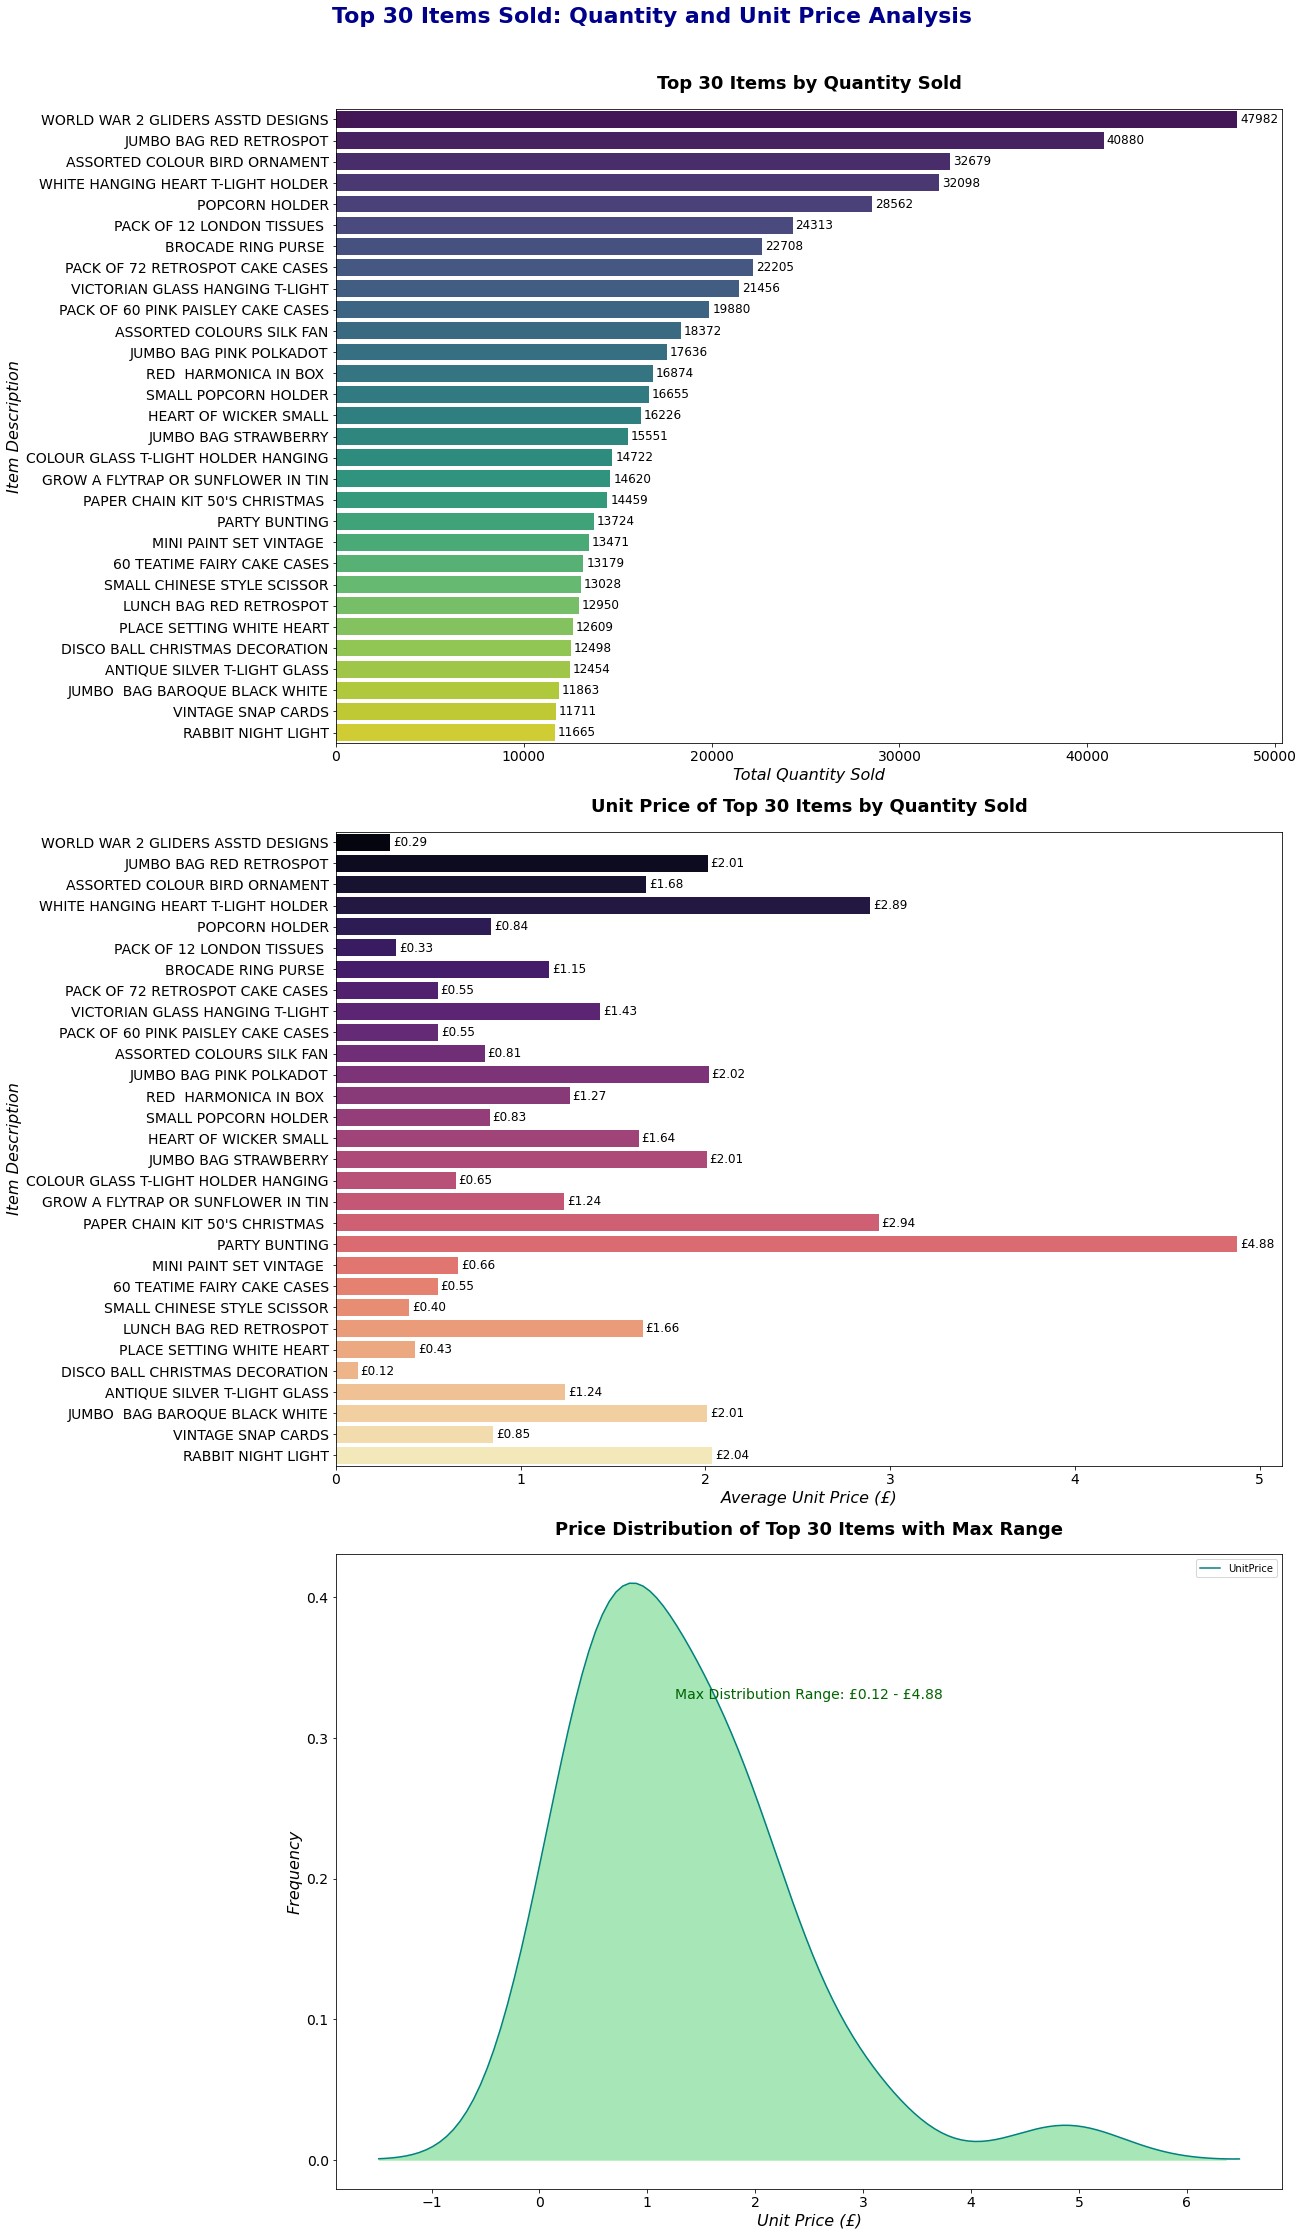

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a function to plot top 30 items by quantity sold, their unit price, and price distribution
def plot_top_30_items_by_quantity_and_price(dataframe):
    """
    Plot the top 30 items by quantity sold and their unit price from the provided DataFrame,
    along with the price distribution.
    
    Args:
    dataframe (pd.DataFrame): DataFrame containing columns ['StockCode', 'Description', 'Quantity', 'UnitPrice'].
    
    Returns:
    None: Displays three Seaborn plots: quantity sold, unit price, and price distribution.
    """
    # Group by StockCode and Description to calculate total quantities sold and mean unit price
    aggregated_items = dataframe.groupby(
        ["StockCode", "Description"], as_index=False
    ).agg({"Quantity": "sum", "UnitPrice": "mean"})

    # Sort by total quantity in descending order and select the top 30 items
    top_30_items = aggregated_items.sort_values(by="Quantity", ascending=False).head(30)

    # Create a figure with three subplots for quantity, unit price, and price distribution
    fig, axes = plt.subplots(3, 1, figsize=(18, 30), constrained_layout=True)
    fig.suptitle(
        "Top 30 Items Sold: Quantity and Unit Price Analysis", 
        fontsize=22, fontweight="bold", color="darkblue", y=1.03
    )

    # Plot quantity sold using Seaborn
    ax1 = sns.barplot(
        data=top_30_items,
        x="Quantity",
        y="Description",
        palette="viridis",
        ax=axes[0]
    )
    ax1.set_title("Top 30 Items by Quantity Sold", fontsize=18, fontweight='bold', pad=20)
    ax1.set_xlabel("Total Quantity Sold", fontsize=16, fontstyle='italic')
    ax1.set_ylabel("Item Description", fontsize=16, fontstyle='italic')
    ax1.tick_params(axis="x", labelsize=14)
    ax1.tick_params(axis="y", labelsize=14)
    
    # Add value annotations for quantity
    for container in ax1.containers:
        ax1.bar_label(container, fmt="%.0f", label_type="edge", fontsize=12, padding=3)

    # Plot unit price of the top 30 items
    ax2 = sns.barplot(
        data=top_30_items,
        x="UnitPrice",
        y="Description",
        palette="magma",
        ax=axes[1]
    )
    ax2.set_title("Unit Price of Top 30 Items by Quantity Sold", fontsize=18, fontweight='bold', pad=20)
    ax2.set_xlabel("Average Unit Price (£)", fontsize=16, fontstyle='italic')
    ax2.set_ylabel("Item Description", fontsize=16, fontstyle='italic')
    ax2.tick_params(axis="x", labelsize=14)
    ax2.tick_params(axis="y", labelsize=14)
    
    # Add value annotations for unit price (with £ symbol)
    for container in ax2.containers:
        ax2.bar_label(
            container, fmt="£%.2f", label_type="edge", fontsize=12, padding=3
        )

    # Calculate the range of unit price where maximum distribution lies
    unit_price_data = top_30_items["UnitPrice"]
    
    # Ensure unit prices are non-negative
    unit_price_data = unit_price_data[unit_price_data >= 0]
    
    # Plot KDE
    kde = sns.kdeplot(unit_price_data, shade=True, color="teal", ax=axes[2])

    # Restrict the KDE to the actual data range
    min_price = unit_price_data.min()
    max_price = unit_price_data.max()

    # Find the range of the distribution with maximum KDE density
    kde_data = kde.get_lines()[0].get_data()
    kde_x = kde_data[0]
    kde_y = kde_data[1]
    max_density_idx = kde_y.argmax()  # Index of the maximum density
    max_density_x = kde_x[max_density_idx]

    # Plot shaded area around the range with maximum distribution
    left_idx = kde_y[:max_density_idx].argmin()  # Index where the distribution starts decreasing
    right_idx = kde_y[max_density_idx:].argmin() + max_density_idx  # Index where it starts to decrease

    left_price = kde_x[left_idx]
    right_price = kde_x[right_idx]

    # Ensure that the shaded area lies within the actual data range
    left_price = max(left_price, min_price)
    right_price = min(right_price, max_price)

    axes[2].fill_between(kde_x[left_idx:right_idx], kde_y[left_idx:right_idx], color="lightgreen", alpha=0.5)
    axes[2].text((left_price + right_price) / 2, max(kde_y) * 0.8, f"Max Distribution Range: £{left_price:.2f} - £{right_price:.2f}", fontsize=14, ha="center", color="darkgreen")

    axes[2].set_title("Price Distribution of Top 30 Items with Max Range", fontsize=18, fontweight='bold', pad=20)
    axes[2].set_xlabel("Unit Price (£)", fontsize=16, fontstyle='italic')
    axes[2].set_ylabel("Frequency", fontsize=16, fontstyle='italic')
    axes[2].tick_params(axis="x", labelsize=14)
    axes[2].tick_params(axis="y", labelsize=14)

    # Show the final visualization
    plt.show()

    
plot_top_30_items_by_quantity_and_price(dataframe=retail_data)


### <font color='darkgreen'>Observations on Top 30 Items Sold and Their Unit Prices
<br>
<font color='green'>
    
1. **Quantity Range**: 
   - Quantities sold for the top 30 items range from **11,665** (min) to **47,982** (max).


2. **Unit Price Range**: 
   - Prices for these items range from **£0.12** to **£4.88**, with no clear pattern linking price to quantity sold.


3. **Price Distribution**: 
   - The prices are spread across a wide range, with both low-cost and moderately priced items included in the top 30.


4. **Maximum Price**: 
   - The maximum unit price within the top 30 items is **£4.88**.


5. **Time Period**: 
   - The data covers **2010-12-01** to **2011-12-09**.


6. **Demand vs. Pricing**: 
   - High sales volumes do not appear to correlate with higher prices, suggesting that factors beyond pricing influence demand.


7. **Insights**: 
   - Sales volume is not strictly dependent on price, offering opportunities to optimize product offerings by balancing high-demand and high-margin items.



In [27]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Offer_Price'],
      dtype='object')

In [28]:
# Dropping columns that are no longer required for RFM Segmentation Analysis
retail_data.drop(['StockCode', 'Description', 'Quantity', 'UnitPrice'], axis=1, inplace=True)
retail_data = retail_data.loc[:, ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Offer_Price']].reset_index(drop=True)
retail_data.head()

,CustomerID,InvoiceNo,InvoiceDate,Offer_Price
0,17850,536365,2010-12-01,15.30
1,17850,536365,2010-12-01,20.34
2,17850,536365,2010-12-01,22.00
3,17850,536365,2010-12-01,20.34
4,17850,536365,2010-12-01,20.34


### <font color='purple'>Step 4: RFM Analysis

### <font color='blue'>Pointers to consider
- **Recency & Frequency**: Calculated based on positive offer price transactions only.  
- **Monetary Value**: Computed by including all transactions, including returns (negative offer price). 

#### <font color='maroon'>Segregating data into two sets 

- (i) For RECENCY and FREQUENCY: `retail_data_RF`
- (ii) For MONETARY: `retail_data_M`

In [29]:
# Checking for cases of refund in the database
print(f"Count of refund records: {retail_data.loc[retail_data['Offer_Price'] <= 0].shape[0]}");print()

# Segregating the dataset
retail_data_RF = retail_data.loc[retail_data['Offer_Price'] > 0].reset_index(drop=True)
retail_data_M = retail_data.copy()

print(f"Count of records for computing RECENCY and FREQUENCY (excluding cases of refund or cancellation): {retail_data_RF.shape[0]}")
print(f"Count of records for computing MONETARY (including cases of refund or cancellation)?            : {retail_data_M.shape[0]}")


Count of refund records: 7356

Count of records for computing RECENCY and FREQUENCY (excluding cases of refund or cancellation): 354223
Count of records for computing MONETARY (including cases of refund or cancellation)?            : 361579


#### <font color='blue'>(4.1) Computing 'RECENCY'

In [30]:
# Creating df_recency by grouping  CustomerID number and finding the max InvoiceDate for each group.
df_recency = retail_data_RF.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()

# Renaming the CustomerID to CustomerID and InvoiceDate to Last Purchase Date.
df_recency.columns = ['CustomerID', 'Last Purchase Date']

# Calculate recent_date find the maximum value  
recent_date = df_recency['Last Purchase Date'].max() + timedelta(days=0)
print(f"Recent Date: {recent_date}")

# Calculate RECENCY for each contact number.lambda calculate the days between recent data and puchase date
df_recency['RECENCY'] = df_recency['Last Purchase Date'].apply(lambda x: (recent_date - x).days)

# ==============================================================================================
# (UNCOMMENT) -> FOR RECENCY IN MONTHS 
# ==============================================================================================
# # Calculating average days in a month throughout the year
# avg_days_monthwise = np.round(365/12, 5)

# # Calculating RECENCY for each contact number in NUMBER OF MONTHS
# df_recency['RECENCY'] = df_recency['RECENCY'].apply(lambda x: round(x/avg_days_monthwise, 2))
# ==============================================================================================

# Droping Last Purchase Date column fro df_recency
df_recency.drop('Last Purchase Date',axis =1, inplace = True)

# Checking the valume of df_recency dataframe
df_recency.shape

Recent Date: 2011-12-09


(3904, 2)

In [31]:
# Sorting df_recency using RECENCY by assending order
df_recency.sort_values('RECENCY', inplace=True)

# Calculating percentile for RECENCY
percentile_r = np.percentile(df_recency['RECENCY'], np.arange(1,101))

# Taking range for percentile 1 to 100
rangee = np.arange(1,101)

# Creating dataframe perc_recency for PERCENTILE and RECENCY
perc_recency = pd.DataFrame({'PERCENTILE': rangee, 'RECENCY': percentile_r})

# Cheking the data
perc_recency.tail()

,PERCENTILE,RECENCY
95,96,319.0
96,97,333.0
97,98,360.0
98,99,368.0
99,100,373.0


In [32]:
perc_recency.head()

,PERCENTILE,RECENCY
0,1,1.0
1,2,1.0
2,3,1.0
3,4,2.0
4,5,2.0


#### <font color='blue'>(4.2) Computing 'FREQUENCY'

In [33]:
# Creating dataframe frequency_df by grouping CustomerID and distinct InvoiceNo count.
frequency_df = retail_data_RF.groupby(by='CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the InvoiceNo (value would be InvoiceNo. unique count) to FREQUENCY.
frequency_df.columns = ['CustomerID','FREQUENCY']

# Checking data 
frequency_df.tail()

,CustomerID,FREQUENCY
3899,18280,1
3900,18281,1
3901,18282,2
3902,18283,16
3903,18287,3


In [34]:
# Checking the variation in frequency values across distinct customers
frequency_df['FREQUENCY'].value_counts()

1      1337
2       743
3       465
4       352
5       216
6       158
7       130
8        87
9        61
11       48
10       46
12       41
13       28
15       23
14       20
17       17
18       12
19       12
16       11
20       11
21       10
25        7
26        7
28        6
23        5
22        4
34        3
27        3
24        3
37        3
30        3
31        2
33        2
39        2
38        2
32        2
47        2
46        1
29        1
124       1
91        1
51        1
45        1
63        1
62        1
41        1
48        1
93        1
55        1
44        1
57        1
50        1
209       1
35        1
97        1
86        1
60        1
Name: FREQUENCY, dtype: int64

In [35]:
# Calculating percentile for RECENCY 
percentile_f = np.percentile(frequency_df['FREQUENCY'], np.arange(1,101))

# Creating data frame perc_frequency using PERCENTILE and FREQUENCY NOTE: rangee already define above cell
perc_frequency = pd.DataFrame({'PERCENTILE': rangee, 'FREQUENCY': percentile_f})

# Checking data 
perc_frequency.tail()

,PERCENTILE,FREQUENCY
95,96,15.00
96,97,18.00
97,98,21.00
98,99,29.97
99,100,209.00


In [36]:
perc_frequency.tail(5)

,PERCENTILE,FREQUENCY
95,96,15.00
96,97,18.00
97,98,21.00
98,99,29.97
99,100,209.00


#### <font color='blue'>(4.3) Computing 'MONETARY'

In [37]:
# Creating dataframe monetary_df by grouping CustomerID and taking Offer_Price sum.
monetary_df = retail_data_M.groupby(by='CustomerID', as_index=False)['Offer_Price'].sum()

# Rename Offer_Price to MONETARY.
monetary_df.columns = ['CustomerID', 'MONETARY']

# Checking data 
monetary_df.head()

,CustomerID,MONETARY
0,12747,4196.01
1,12748,29072.10
2,12749,3868.20
3,12820,942.34
4,12821,92.72


In [38]:
# Calculating percentile for MONETARY 
percentile_m = np.percentile(monetary_df['MONETARY'], np.arange(1,101))

# Creating data frame v using PERCENTILE and MONETARY NOTE: rangee already define above cell
perc_monetary = pd.DataFrame({'PERCENTILE': rangee, 'MONETARY': percentile_m})

# Convert datatype here.
perc_monetary['MONETARY'] = perc_monetary['MONETARY'].astype('int64')

# Checking data 
perc_monetary.tail()

,PERCENTILE,MONETARY
95,96,6176
96,97,7276
97,98,10154
98,99,16290
99,100,256438


In [39]:
monetary_df.columns

Index(['CustomerID', 'MONETARY'], dtype='object')

#### <font color='blue'>(4.4) Merging the 'CustomerID' with 'RECENCY', 'FREQUENCY' and 'MONETARY' values`

In [40]:
# merging dataframe on contact number. 
rf = df_recency.merge(frequency_df, on='CustomerID')
# NOTE: 'rfm' datatabe is data containing 'Customers' level RECENCY, FREQUENCY and MONETARY values (PRIOR OUTLIER FILTER)
rfm = rf.merge(monetary_df, on='CustomerID')
rfm.tail()

,CustomerID,RECENCY,FREQUENCY,MONETARY
3899,16048,373,2,243.69
3900,16274,373,1,357.95
3901,16583,373,1,233.45
3902,17968,373,1,277.35
3903,15922,373,1,363.60


#### <font color='green'>Saving RFM dataframe (prior outlier removal) to a csv file

In [41]:
# Saving RFM dataframe (prior outlier removal) to a csv file
# NOTE: 'rfm' contains customer level RFM data
rfm.to_csv('./Output_Files/RFM_Data_UKRetailOnline_prior_outlier_removal.csv', index=False)

#### <font color='blue'>(4.5) Merging the 'PERCENTILE' values of 'RECENCY', 'FREQUENCY' and 'MONETARY'

In [42]:
# Merging dataframe on PERCENTILE. 
rf_df = perc_recency.merge(perc_frequency, on='PERCENTILE')
rfm_df = rf_df.merge(perc_monetary, on='PERCENTILE')
rfm_df.head(10)

,PERCENTILE,RECENCY,FREQUENCY,MONETARY
0,1,1.0,1.0,51
1,2,1.0,1.0,74
2,3,1.0,1.0,89
3,4,2.0,1.0,101
4,5,2.0,1.0,110
5,6,3.0,1.0,114
6,7,3.0,1.0,123
7,8,4.0,1.0,134
8,9,4.0,1.0,142
9,10,5.0,1.0,151


In [43]:
rfm_df.tail(10)

,PERCENTILE,RECENCY,FREQUENCY,MONETARY
90,91,266.00,10.00,3542
91,92,275.00,10.00,3801
92,93,283.79,11.00,4159
93,94,297.00,12.00,4730
94,95,310.00,13.00,5347
95,96,319.00,15.00,6176
96,97,333.00,18.00,7276
97,98,360.00,21.00,10154
98,99,368.00,29.97,16290
99,100,373.00,209.00,256438


<AxesSubplot:ylabel='Density'>

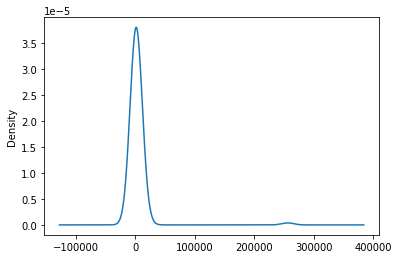

In [44]:
# Plotting a KDE of MONETARY
rfm_df['MONETARY'].plot(kind='kde')

In [45]:
#percentile merge data save into csv here..
rfm_df.to_csv('./Output_Files/RFM_Perc_UKRetailOnline_prior_outlier_removal.csv', index=False)

#### <font color='blue'>(4.6) Setting up threshold to remove FREQUENCY and MONETARY Outliers

In [46]:
# Calculate quantile for FREQUENCY outlier..
rfm.FREQUENCY.quantile([0.99, 0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.990     29.970
0.991     31.000
0.992     33.000
0.993     34.679
0.994     37.582
0.995     39.970
0.996     46.388
0.997     50.291
0.998     60.388
0.999     91.194
1.000    209.000
Name: FREQUENCY, dtype: float64

In [47]:
# Applying threshould here and checking how much customer filter here
freq_thresh_perc = 99  # EDIT IF REQUIRED
freq_thresh_val = rfm.FREQUENCY.quantile([freq_thresh_perc/100]).values[0].round()

In [48]:
# Calculating quantile for MONETARY outlier..
rfm.MONETARY.quantile([0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1]).round()

0.990     16291.0
0.991     17067.0
0.992     20233.0
0.993     26345.0
0.994     27765.0
0.995     32295.0
0.996     34793.0
0.997     50900.0
0.998     54790.0
0.999     62967.0
1.000    256438.0
Name: MONETARY, dtype: float64

In [49]:
# Applying threshould here and checking how much customer filter here
monetary_thresh_perc = 99  # EDIT IF REQUIRED
monetary_thresh_val = rfm.MONETARY.quantile([monetary_thresh_perc/100]).values[0].round()

In [50]:
# Creating a copy of dataframe rfm as rfm1
rfm1= rfm.copy()

print(f"Count of records eliminated post FREQUENCY Outlier threshold filter: {rfm1[rfm1.FREQUENCY > freq_thresh_val].shape[0]}")
print(f"Count of records eliminated post MONETARY Outlier threshold filter: {rfm1[rfm1.MONETARY > monetary_thresh_val].shape[0]}")

# Removing datapoints surpassing the outlier thresholds (meeting FREQUENCY Outlier and MONETARY Outlier criteria)
rfm1.drop(rfm1[rfm1['FREQUENCY'] > freq_thresh_val].index, inplace = True)
rfm1.drop(rfm1[rfm1['MONETARY'] > monetary_thresh_val].index, inplace = True)

# Checking the valume of data after removing outlier.
rfm1.shape

Count of records eliminated post FREQUENCY Outlier threshold filter: 37
Count of records eliminated post MONETARY Outlier threshold filter: 40


(3849, 4)

#### <font color='green'>Saving the RFM data (post-outlier removal)

In [51]:
# Saving data after removing outliers
rfm1.to_csv('./Output_Files/RFM_Data_UKRetailOnline_post_outlier_removal.csv', index=False)

##### <font color='brown'>Calculating average WITH OUTLIERS.

In [52]:
# Calculating average WITH OUTLIERS.
# NOTE: Here we use the previous dataframe rfm (unfiltered)
rfm.iloc[:,1:4].mean()

RECENCY        91.398309
FREQUENCY       4.258965
MONETARY     1736.612985
dtype: float64

#### <font color='green'>Going forward, using the filtered dataframe (obtained post-outlier removal)

##### <font color='brown'>Calculating average WITHOUT OUTLIERS.

In [53]:
# Calculating average WITHOUT OUTLIERS. (in rfm1)
rfm1.iloc[:,1:4].mean()

RECENCY        92.470252
FREQUENCY       3.700442
MONETARY     1255.710812
dtype: float64

#### <font color='blue'>(4.7) Recomputing Percentiles - Recency, Frequency and Monetary (post-outlier removal)

In [54]:
# Calculating percentile for 'RECENCY' 
percentile_r1 = np.percentile(rfm1['RECENCY'], np.arange(1,101))

# Range for percentile 1 to 100
rangee = np.arange(1,101)

# Creating dataframe perc_recency1 with PERCENTILE and RECENCY
perc_recency1 = pd.DataFrame({'PERCENTILE': rangee, 'RECENCY': percentile_r1})

# cheacking data here..
perc_recency1.head()

,PERCENTILE,RECENCY
0,1,1.0
1,2,1.0
2,3,2.0
3,4,2.0
4,5,3.0


In [55]:
# Calculating percentile for FREQUENCY..
percentile_f1 = np.percentile(rfm1['FREQUENCY'], np.arange(1,101))

# Creating dataframe perc_frequency1 with PERCENTILE and FREQUENCY, NOTE: rangee alreaday define in above cell
perc_frequency1 = pd.DataFrame({'PERCENTILE': rangee, 'FREQUENCY': percentile_f1})

# Checking data here..
perc_frequency1.head()

,PERCENTILE,FREQUENCY
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [56]:
# Calculating percentile for MONETARY
percentile_m1 = np.percentile(rfm1['MONETARY'], np.arange(1,101))

# Creating dataframe perc_monetary1 using PERCENTILE and MONETARY,NOTE:rangee alreaday define in above cell.  
perc_monetary1 = pd.DataFrame({'PERCENTILE': rangee, 'MONETARY': percentile_m1})

# Checking data 
perc_monetary1.head()

,PERCENTILE,MONETARY
0,1,50.7660
1,2,73.7688
2,3,88.9984
3,4,100.7760
4,5,109.8600


In [57]:
perc_monetary1.tail()

,PERCENTILE,MONETARY
95,96,5116.9468
96,97,5832.9224
97,98,6913.3208
98,99,9264.7244
99,100,16219.2200


#### <font color='blue'>(4.8) Merging Recomputed PERCENTILE values - Recency, Frequency, and Monetary

In [58]:
# Dataframe merge here on PERCENTILE 
rf_df1 = perc_recency1.merge(perc_frequency1, on='PERCENTILE')
rfm_df1 = rf_df1.merge(perc_monetary1, on='PERCENTILE')
rfm_df1

,PERCENTILE,RECENCY,FREQUENCY,MONETARY
0,1,1.00,1.0,50.7660
1,2,1.00,1.0,73.7688
2,3,2.00,1.0,88.9984
3,4,2.00,1.0,100.7760
4,5,3.00,1.0,109.8600
5,6,3.00,1.0,114.5396
6,7,4.00,1.0,122.7000
7,8,4.00,1.0,133.6008
8,9,5.00,1.0,140.4620
9,10,5.00,1.0,151.2860


#### <font color='green'>Saving RFM data to an excel file (final RFM file)`

In [59]:
# Saving all dataframes sheetwise in excel..
writer = pd.ExcelWriter('./Output_Files/RFM_Perc_UKRetailOnline_final.xlsx', engine='xlsxwriter')
perc_recency1.to_excel(writer, sheet_name='RECENCY')
perc_frequency1.to_excel(writer, sheet_name='FREQUENCY')
perc_monetary1.to_excel(writer, sheet_name='MONETARY')
rfm_df1.to_excel(writer, sheet_name='RFM')
writer.save()

**NOTE:** 

##### <font color='green'>Saved file details (as per dataframe names listed below)

#### <font color='blue'> Customer-level RFM Data
    
- (i) `rfm`: Customer-level data containing RECENCY, FREQUENCY and MONETARY values *(prior outlier removal)*.<br>**[Filename: 'RFM_Data_UKRetailOnline_prior_outlier_removal.csv']** 


- (ii) `rfm1`: Customer-level data containing RECENCY, FREQUENCY and MONETARY values *(post outlier removal)*.<br>**[Filename: 'RFM_Data_UKRetailOnline_post_outlier_removal.csv']**


#### <font color='blue'>Percentile-wise RFM Data
 
- (iii) `rfm_df`: PERCENTILE level data containing RECENCY, FREQUENCY, and MONETARY values *(prior outlier removal)*.<br>**[Filename: 'RFM_Perc_UKRetailOnline_prior_outlier_removal.csv']**


- (iv) `rfm_df1`: PERCENTILE level data containing RECENCY, FREQUENCY, and MONETARY values *(post outlier removal) - to avoid skewed values of thresholds (to be used for segmentation purposes).*<br>**[Filename: 'RFM_Perc_UKRetailOnline_final.xlsx']**

## <font color='purple'>Step 5: Segmentation

#### <font color='blue'>(5.1) Conditions: For Recency

In [60]:
## Manually speculating thresholds For Recency
perc_recency1

,PERCENTILE,RECENCY
0,1,1.00
1,2,1.00
2,3,2.00
3,4,2.00
4,5,3.00
5,6,3.00
6,7,4.00
7,8,4.00
8,9,5.00
9,10,5.00


In [61]:
# Thresholds to separate Low-Medium-High (10th percentile and 40th percentile)

# For Recency (if in DAYS)
# NOTE: Considering integer values (since the values of RECENCY are in number of days)
recency_10th_perc = perc_recency1.loc[perc_recency1.PERCENTILE==10,"RECENCY"].values[0].round()
recency_40th_perc = perc_recency1.loc[perc_recency1.PERCENTILE==40,"RECENCY"].values[0].round()

# # (UNCOMMENT) For Recency (if in MONTHS)
# # NOTE: Considering floating point values (since the values of RECENCY are in number of months)
# recency_10th_perc = np.round(perc_recency1.loc[perc_recency1.PERCENTILE==10,"RECENCY"].values[0], 2)
# recency_40th_perc = np.round(perc_recency1.loc[perc_recency1.PERCENTILE==40,"RECENCY"].values[0], 2)

print(f"Recency Lower Limit Value: {recency_10th_perc}")
print(f"Recency Upper Limit Value: {recency_40th_perc}")

#Creating new column called RECENCY_THRESHOLD using condition and value.
conditions = [
    (rfm['RECENCY'] <= recency_10th_perc),
    (rfm['RECENCY'] > recency_10th_perc) & (rfm['RECENCY'] <= recency_40th_perc),
    (rfm['RECENCY'] > recency_40th_perc)
    ]
values = ['H', 'M', 'L']

rfm['RECENCY_THRESHOLD'] = np.select(conditions, values)

print("\n\nPercentages Basis RECENCY Threshold:")
(round(100*rfm['RECENCY_THRESHOLD'].value_counts()/rfm['RECENCY_THRESHOLD'].count(), 3)).reindex(['H', 'M', 'L'])

Recency Lower Limit Value: 5.0
Recency Upper Limit Value: 33.0


Percentages Basis RECENCY Threshold:


H    10.784
M    30.533
L    58.683
Name: RECENCY_THRESHOLD, dtype: float64

#### <font color='blue'>(5.2) Conditions: For Frequency

In [62]:
# Loading all percentile values of FREQUENCY (post removal of outliers)
perc_frequency1

,PERCENTILE,FREQUENCY
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


In [63]:
# ====================================================================================
# Manually considering thresholds of FREQUENCY percentile values to map conditions
# ====================================================================================
freq_lower_limit_val = 1
freq_upper_limit_val = 2

print(f"Frequency Lower Limit Value: {freq_lower_limit_val}")
print(f"Frequency Upper Limit Value: {freq_upper_limit_val}")

#Creating new column called FREQUENCY_THRESHOLD using condition and value.
conditions = [
    (rfm['FREQUENCY'] > freq_upper_limit_val),
    (rfm['FREQUENCY'] <= freq_upper_limit_val) & (rfm['FREQUENCY'] > freq_lower_limit_val),
    (rfm['FREQUENCY'] <= freq_lower_limit_val)
    ]
values = ['H', 'M', 'L']

rfm['FREQUENCY_THRESHOLD'] = np.select(conditions, values)

print("\n\nPercentages Basis FREQUENCY Threshold:")
(round(100*rfm['FREQUENCY_THRESHOLD'].value_counts()/rfm['FREQUENCY_THRESHOLD'].count(), 3)).reindex(['H', 'M', 'L'])

Frequency Lower Limit Value: 1
Frequency Upper Limit Value: 2


Percentages Basis FREQUENCY Threshold:


H    46.721
M    19.032
L    34.247
Name: FREQUENCY_THRESHOLD, dtype: float64

#### <font color='blue'>(5.3) Conditions: For Monetary

In [64]:
## Manually speculating thresholds For Monetary
perc_monetary1

,PERCENTILE,MONETARY
0,1,50.7660
1,2,73.7688
2,3,88.9984
3,4,100.7760
4,5,109.8600
5,6,114.5396
6,7,122.7000
7,8,133.6008
8,9,140.4620
9,10,151.2860


In [65]:
# Thresholds to separate Low-Medium-High (10th percentile and 40th percentile)
monetary_10th_perc = perc_monetary1.loc[perc_monetary1.PERCENTILE==10,"MONETARY"].values[0].round()
monetary_40th_perc = perc_monetary1.loc[perc_monetary1.PERCENTILE==40,"MONETARY"].values[0].round()
print(f"Monetary 10th Percentile: {monetary_10th_perc}")
print(f"Monetary 40th Percentile: {monetary_40th_perc}")

#Creating new column called MONETARY_THRESHOLD using condition and value.
conditions = [
    (rfm['MONETARY'] > monetary_40th_perc),
    (rfm['MONETARY'] <= monetary_40th_perc) & (rfm['MONETARY'] > monetary_10th_perc),
    (rfm['MONETARY'] <= monetary_10th_perc)
    ]
values = ['H', 'M', 'L']

rfm['MONETARY_THRESHOLD'] = np.select(conditions, values)

print("\n\nPercentages Basis MONETARY Threshold:")
(round(100*rfm['MONETARY_THRESHOLD'].value_counts()/rfm['MONETARY_THRESHOLD'].count(), 3)).reindex(['H', 'M', 'L'])

Monetary 10th Percentile: 151.0
Monetary 40th Percentile: 447.0


Percentages Basis MONETARY Threshold:


H    60.553
M    29.636
L     9.810
Name: MONETARY_THRESHOLD, dtype: float64

In [66]:
# Creating new column called THRESHOLD using earlier created columns.
rfm['THRESHOLD'] = rfm[['RECENCY_THRESHOLD', 'FREQUENCY_THRESHOLD', 'MONETARY_THRESHOLD']].T.agg('-'.join)
rfm.head()

,CustomerID,RECENCY,FREQUENCY,MONETARY,RECENCY_THRESHOLD,FREQUENCY_THRESHOLD,MONETARY_THRESHOLD,THRESHOLD
0,13069,0,24,3717.82,H,H,H,H-H-H
1,13113,0,24,10510.00,H,H,H,H-H-H
2,17754,0,5,1739.92,H,H,H,H-H-H
3,13777,0,33,25748.35,H,H,H,H-H-H
4,14441,0,4,1545.14,H,H,H,H-H-H


#### <font color='blue'>(5.4) Total SEGMENTS and their counts

In [67]:
print(f"Total count of SEGMENTS: {rfm['THRESHOLD'].nunique()}");print()
rfm.groupby('THRESHOLD')['CustomerID'].count()

Total count of SEGMENTS: 26



THRESHOLD
H-H-H    337
H-H-M     11
H-L-H      5
H-L-L      6
H-L-M     14
H-M-H     24
H-M-L      1
H-M-M     23
L-H-H    618
L-H-L      8
L-H-M     65
L-L-H    208
L-L-L    287
L-L-M    624
L-M-H    273
L-M-L     20
L-M-M    188
M-H-H    757
M-H-L      1
M-H-M     27
M-L-H     27
M-L-L     49
M-L-M    117
M-M-H    115
M-M-L     11
M-M-M     88
Name: CustomerID, dtype: int64

### <font color='purple'>Step 6: Profiling RFM Segments basis conditions

#### <font color='blue'>(6.1) Conditions based RFM Segments mapping

In [68]:
# Creating new THRESHOLD_CUST column based on several conditions and values.
conditions = [
    (rfm['THRESHOLD'] == 'L-H-H') | (rfm['THRESHOLD'] == 'L-M-H') | (rfm['THRESHOLD'] == 'L-L-H'),
    (rfm['THRESHOLD'] == 'H-H-H') | (rfm['THRESHOLD'] == 'H-M-H') | (rfm['THRESHOLD'] == 'M-H-H') | (rfm['THRESHOLD'] == 'M-M-H'),
    (rfm['THRESHOLD'] == 'L-H-M') | (rfm['THRESHOLD'] == 'L-L-M') | (rfm['THRESHOLD'] == 'L-M-M'),
    (rfm['THRESHOLD'] == 'M-L-H') | (rfm['THRESHOLD'] == 'M-L-L') | (rfm['THRESHOLD'] == 'M-L-M'),
    (rfm['THRESHOLD'] == 'H-L-H') | (rfm['THRESHOLD'] == 'H-L-L') | (rfm['THRESHOLD'] == 'H-L-M'),
    (rfm['THRESHOLD'] == 'H-H-L') | (rfm['THRESHOLD'] == 'H-H-M') | (rfm['THRESHOLD'] == 'H-M-L') | (rfm['THRESHOLD'] == 'H-M-M') | (rfm['THRESHOLD'] == 'M-H-L') | (rfm['THRESHOLD'] == 'M-H-M') | (rfm['THRESHOLD'] == 'M-M-L') | (rfm['THRESHOLD'] == 'M-M-M'),
    (rfm['THRESHOLD'] == 'L-H-L') | (rfm['THRESHOLD'] == 'L-L-L') | (rfm['THRESHOLD'] == 'L-M-L')
]

values = ['Super Loyal Churned', 'Super Loyal', 'Potentially Inactive', 'Potential', 'New Acquisition', 'Loyal', 'Inactive']

rfm['THRESHOLD_CUST'] = np.select(conditions, values)
rfm.head()

,CustomerID,RECENCY,FREQUENCY,MONETARY,RECENCY_THRESHOLD,FREQUENCY_THRESHOLD,MONETARY_THRESHOLD,THRESHOLD,THRESHOLD_CUST
0,13069,0,24,3717.82,H,H,H,H-H-H,Super Loyal
1,13113,0,24,10510.00,H,H,H,H-H-H,Super Loyal
2,17754,0,5,1739.92,H,H,H,H-H-H,Super Loyal
3,13777,0,33,25748.35,H,H,H,H-H-H,Super Loyal
4,14441,0,4,1545.14,H,H,H,H-H-H,Super Loyal


In [69]:
# Count of One Time Shoppers
print(f"Count of customers who were One Time Shoppers (One Timers): {rfm[rfm.FREQUENCY == 1].shape[0]}")
print(f"Count of distinct customers: {rfm['CustomerID'].nunique()}")
# Checking percentage of data where customer shop only once
print(f"Percentage of data where customer shop only once: {rfm[rfm.FREQUENCY == 1].shape[0]/rfm.shape[0]*100:.2f}%")

Count of customers who were One Time Shoppers (One Timers): 1337
Count of distinct customers: 3904
Percentage of data where customer shop only once: 34.25%


In [70]:
rfm['THRESHOLD_CUST'].value_counts()

Super Loyal             1233
Super Loyal Churned     1099
Potentially Inactive     877
Inactive                 315
Potential                193
Loyal                    162
New Acquisition           25
Name: THRESHOLD_CUST, dtype: int64

In [71]:
# Grouping segments to get customer counts (based on transactions data)
rfm_grouped = pd.DataFrame(rfm.groupby(['THRESHOLD_CUST', 'THRESHOLD'])['CustomerID'].count()).reset_index()
rfm_grouped.rename(columns={"THRESHOLD_CUST": "Profiling", "THRESHOLD": "RFM_Segments", "CustomerID": "Count"}, inplace=True)
rfm_grouped.sort_values(by=['Profiling', 'RFM_Segments'], ascending=False, inplace=True)
rfm_grouped

,Profiling,RFM_Segments,Count
25,Super Loyal Churned,L-M-H,273
24,Super Loyal Churned,L-L-H,208
23,Super Loyal Churned,L-H-H,618
22,Super Loyal,M-M-H,115
21,Super Loyal,M-H-H,757
20,Super Loyal,H-M-H,24
19,Super Loyal,H-H-H,337
18,Potentially Inactive,L-M-M,188
17,Potentially Inactive,L-L-M,624
16,Potentially Inactive,L-H-M,65


In [72]:
# =================================================================
# Universal space of all segments 
# (NOTE: MIGHT CHANGE IF THE SEGMENTING CONDITIONS ARE CHANGED)
# =================================================================
# Defining the RFM segments and profiling labels
conditions_all = [
    ['L-H-H', 'L-M-H', 'L-L-H'],
    ['H-H-H', 'H-M-H', 'M-H-H', 'M-M-H'],
    ['L-H-M', 'L-L-M', 'L-M-M'],
    ['M-L-H', 'M-L-L', 'M-L-M'],
    ['H-L-H', 'H-L-L', 'H-L-M'],
    ['H-H-L', 'H-H-M', 'H-M-L', 'H-M-M', 'M-H-L', 'M-H-M', 'M-M-L', 'M-M-M'],
    ['L-H-L', 'L-L-L', 'L-M-L']
]

values_all = [
    'Super Loyal Churned', 'Super Loyal', 'Potentially Inactive',
    'Potential', 'New Acquisition', 'Loyal', 'Inactive'
]


# Creating the DataFrame
rfm_seg_profiling_df = pd.DataFrame(
    [(segment, label) for condition, label in zip(conditions_all, values_all) for segment in condition],
    columns=['RFM_Segments', 'Profiling']
)

rfm_seg_profiling_df['Profiling'] = rfm_seg_profiling_df['Profiling'].astype(str) 
rfm_seg_profiling_df['RFM_Segments'] = rfm_seg_profiling_df['RFM_Segments'].astype(str) 
rfm_seg_profiling_df.sort_values(by=['Profiling', 'RFM_Segments'], ascending=False, inplace=True)
rfm_seg_profiling_df = rfm_seg_profiling_df.reset_index(drop=True)

rfm_seg_profiling_df

,RFM_Segments,Profiling
0,L-M-H,Super Loyal Churned
1,L-L-H,Super Loyal Churned
2,L-H-H,Super Loyal Churned
3,M-M-H,Super Loyal
4,M-H-H,Super Loyal
5,H-M-H,Super Loyal
6,H-H-H,Super Loyal
7,L-M-M,Potentially Inactive
8,L-L-M,Potentially Inactive
9,L-H-M,Potentially Inactive


#### <font color='blue'>(6.2) RFM Flagging

In [73]:
# RFM Flagging
RFM_Flagging_df = pd.merge(rfm_seg_profiling_df, rfm_grouped, on=['RFM_Segments', 'Profiling'], how='left')
RFM_Flagging_df["Count"] = RFM_Flagging_df["Count"].fillna(0).astype(int)
RFM_Flagging_df["Percentage"] = np.round(100*RFM_Flagging_df["Count"] / RFM_Flagging_df["Count"].sum(), 2)
RFM_Flagging_df

,RFM_Segments,Profiling,Count,Percentage
0,L-M-H,Super Loyal Churned,273,6.99
1,L-L-H,Super Loyal Churned,208,5.33
2,L-H-H,Super Loyal Churned,618,15.83
3,M-M-H,Super Loyal,115,2.95
4,M-H-H,Super Loyal,757,19.39
5,H-M-H,Super Loyal,24,0.61
6,H-H-H,Super Loyal,337,8.63
7,L-M-M,Potentially Inactive,188,4.82
8,L-L-M,Potentially Inactive,624,15.98
9,L-H-M,Potentially Inactive,65,1.66


In [74]:
round(100*(RFM_Flagging_df.groupby("Profiling")['Count'].sum()/RFM_Flagging_df['Count'].sum()),2)

Profiling
Inactive                 8.07
Loyal                    4.15
New Acquisition          0.64
Potential                4.94
Potentially Inactive    22.46
Super Loyal             31.58
Super Loyal Churned     28.15
Name: Count, dtype: float64

#### <font color='green'>Saving RFM_Flagging Dataframe

In [75]:
round(100*(RFM_Flagging_df.groupby("Profiling")['Count'].sum()/RFM_Flagging_df['Count'].sum()),2)

Profiling
Inactive                 8.07
Loyal                    4.15
New Acquisition          0.64
Potential                4.94
Potentially Inactive    22.46
Super Loyal             31.58
Super Loyal Churned     28.15
Name: Count, dtype: float64

#### <font color='green'>Saving RFM_Flagging Dataframe

In [76]:
# Saving RFM_Flagging Dataframe
RFM_Flagging_df.to_csv("./Output_Files/RFM_Flagging_UKRetailOnline.csv", index=False)

#### <font color='blue'>(6.3) RFM Matrix

##### <font color='brown'>Reordering the "RFM_Flagging" data for RFM_Matrix

In [77]:
# Data for the RFM_Matrix_Data 
rfm_matrix_data = {
    "RFM_FLAG": [
        "H-H-H", "H-H-L", "H-H-M",
        "H-L-H", "H-L-L", "H-L-M",
        "H-M-H", "H-M-L", "H-M-M",
        "L-H-H", "L-H-L", "L-H-M",
        "L-L-H", "L-L-L", "L-L-M",
        "L-M-H", "L-M-L", "L-M-M",
        "M-H-H", "M-H-L", "M-H-M",
        "M-L-H", "M-L-L", "M-L-M",
        "M-M-H", "M-M-L", "M-M-M"
    ],
    "RFMINDEX": [
        "HHH", "HHL", "HHM",
        "HLH", "HLL", "HLM",
        "HMH", "HML", "HMM",
        "LHH", "LHL", "LHM",
        "LLH", "LLL", "LLM",
        "LMH", "LML", "LMM",
        "MHH", "MHL", "MHM",
        "MLH", "MLL", "MLM",
        "MMH", "MML", "MMM"
    ]
}

# Create the DataFrame
RFM_Matrix_Data = pd.DataFrame(rfm_matrix_data)
# Data required from 'RFM_Flagging_df'
RFM_Flagging_df_req = RFM_Flagging_df.loc[:, ['RFM_Segments', 'Count']]
RFM_Flagging_df_req.rename(columns={"RFM_Segments": "RFM_FLAG"}, inplace=True)

RFM_Matrix_Data = pd.merge(RFM_Matrix_Data, 
                           RFM_Flagging_df_req,
                           how='inner',
                          on=['RFM_FLAG'])
RFM_Matrix_Data

,RFM_FLAG,RFMINDEX,Count
0,H-H-H,HHH,337
1,H-H-L,HHL,0
2,H-H-M,HHM,11
3,H-L-H,HLH,5
4,H-L-L,HLL,6
5,H-L-M,HLM,14
6,H-M-H,HMH,24
7,H-M-L,HML,1
8,H-M-M,HMM,23
9,L-H-H,LHH,618


#### <font color='green'>Saving RFM_Matrix_Data

In [78]:
# Saving RFM_Matrix_Data
RFM_Matrix_Data.to_csv("./Output_Files/RFM_Matrix_Data_UKRetailOnline.csv", index=False)

#### <font color='blue'>(6.4) Displaying the proportion of the customers in respective segments to total (cross-checking)

In [79]:
# Calculating the proportion of the customers in respective segments to total
value_counts = rfm['THRESHOLD_CUST'].value_counts()
percentage_of_total = round((value_counts / value_counts.sum()) * 100, 2)

profiles_list = ['Super Loyal Churned', 'Potential', \
                 'Potentially Inactive', 'Super Loyal', 'New Acquisition', \
                 'Inactive', 'Loyal']

# Reordering the dictionary based on the profiles_list
percentage_of_total = {key: percentage_of_total[key] for key in profiles_list}

# # Display the results
# print(percentage_of_total)

print("Results:\n")

for idx, (k_, v_) in enumerate(percentage_of_total.items()):
    print(f"{idx+1}. Percentage of Customers belonging to '{k_}' Segment: {v_}%")

Results:

1. Percentage of Customers belonging to 'Super Loyal Churned' Segment: 28.15%
2. Percentage of Customers belonging to 'Potential' Segment: 4.94%
3. Percentage of Customers belonging to 'Potentially Inactive' Segment: 22.46%
4. Percentage of Customers belonging to 'Super Loyal' Segment: 31.58%
5. Percentage of Customers belonging to 'New Acquisition' Segment: 0.64%
6. Percentage of Customers belonging to 'Inactive' Segment: 8.07%
7. Percentage of Customers belonging to 'Loyal' Segment: 4.15%


In [80]:
script_end_time = time.time()
time_req_mins = round((script_end_time - script_start_time) / 60, 2)
print(f"Time required for executing the script: {time_req_mins} minutes.")

Time required for executing the script: 0.13 minutes.


# <font color='green'>Customer Segmentation Logic and Insights

## <font color='purple'>Mapping Conditions to Customer Segments
The following logic maps RFM (Recency, Frequency, Monetary) thresholds to specific customer segments:

### <font color='blue'>RFM Threshold Categories
- **H**: High
- **M**: Medium
- **L**: Low

### <font color='blue'>Mapping Logic
    
1. **Super Loyal Churned**  
   - Conditions: Low Recency, High/Medium/Low Frequency, High Monetary  
     `(L-H-H, L-M-H, L-L-H)`
   - Customers who spent significantly but recently stopped engaging.

2. **Super Loyal**  
   - Conditions: High/Medium Recency, High Frequency, High Monetary  
     `(H-H-H, H-M-H, M-H-H, M-M-H)`
   - Highly engaged, consistent, and valuable customers.

3. **Potentially Inactive**  
   - Conditions: Low Recency, Low/Medium Frequency, Medium Monetary  
     `(L-H-M, L-L-M, L-M-M)`
   - Customers at risk of becoming inactive; require re-engagement.

4. **Potential**  
   - Conditions: Medium Recency, Low Frequency, High/Medium/Low Monetary  
     `(M-L-H, M-L-L, M-L-M)`
   - Recently engaged but with lower frequency; potential to increase value.

5. **New Acquisition**  
   - Conditions: High Recency, Low Frequency, High/Medium/Low Monetary  
     `(H-L-H, H-L-L, H-L-M)`
   - Recently acquired customers; focus on onboarding.

6. **Loyal**  
   - Conditions: High/Medium Recency, Medium Frequency, High/Medium/Low Monetary  
     `(H-H-L, H-H-M, H-M-L, H-M-M, M-H-L, M-H-M, M-M-L, M-M-M)`
   - Consistently engaged but with room for growth.

7. **Inactive**  
   - Conditions: Low Recency, Low/Medium Frequency, Low Monetary  
     `(L-H-L, L-L-L, L-M-L)`
   - Customers with minimal engagement; require reactivation efforts.

---

## <font color='purple'>Customer Segmentation Insights

### <font color='blue'>Results
1. **Super Loyal Churned**: 28.15% – High-value churned customers; focus on win-back strategies.
2. **Potential**: 4.94% – Recently engaged; opportunity for upselling.
3. **Potentially Inactive**: 22.46% – At risk of churn; prioritize re-engagement.
4. **Super Loyal**: 31.58% – Most valuable segment; maintain loyalty.
5. **New Acquisition**: 0.64% – Focus on onboarding and conversions.
6. **Inactive**: 8.07% – Reactivation campaigns needed.
7. **Loyal**: 4.15% – Nurture for growth.
        
---

## <font color='purple'>Recommendations
- **Super Loyal Churned**: Personalized win-back campaigns.
- **Potential**: Targeted promotions to increase engagement.
- **Potentially Inactive**: Reminders and offers to prevent churn.
- **Super Loyal**: Loyalty rewards and exclusive benefits.
- **New Acquisition**: Improve onboarding and early retention.
- **Inactive**: Deep discounts or tailored reactivation campaigns.
- **Loyal**: Incentivize loyalty program participation.

### <font color='blue'>Next Steps
- Monitor segment trends to adjust strategies.
- Visualize results with charts for stakeholder communication.
- Use predictive analytics to prevent churn and promote growth.
